<a href="https://colab.research.google.com/github/Alhasuri031202400009/Alhasuri031202400009/blob/main/EDA(AlhasuriFillah).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Univariate and Multivariate Analysis
## Exploratory Data Analysis (EDA)
### Sales Dataset – Hell's Kitchen

In this notebook, we follow the Data Science Process and perform Exploratory Data Analysis (EDA) on the sales dataset.

We specifically focus on transactions from the Hell's Kitchen store.

The analysis includes:

1. Basic Data Analysis
2. Univariate Analysis (Non-Graphical)
3. Univariate Analysis (Graphical)
4. Multivariate Analysis (Non-Graphical)
5. Multivariate Analysis (Graphical)


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


## Load Dataset
We load the dataset and preview the first five rows.

In [54]:
df = pd.read_csv('sales (3).csv')
df.head()

,order_id,date,store,product,quantity,sales
0,1,01/01/2023,Lower Manhattan,Gourmet brewed coffee,2,6.0
1,2,01/01/2023,Lower Manhattan,Brewed Chai tea,2,6.2
2,3,01/01/2023,Lower Manhattan,Hot chocolate,2,9.0
3,4,01/01/2023,Lower Manhattan,Drip coffee,1,2.0
4,5,01/01/2023,Lower Manhattan,Brewed Chai tea,2,6.2


## Filter Data – Hell's Kitchen

We filter the dataset to include only transactions from Hell's Kitchen store.


In [55]:
df = df[df['store'] == "Hell's Kitchen"]
df.head()

,order_id,date,store,product,quantity,sales
17,18,01/01/2023,Hell's Kitchen,Brewed herbal tea,1,2.50
18,19,01/01/2023,Hell's Kitchen,Hot chocolate,2,9.00
19,20,01/01/2023,Hell's Kitchen,Hot chocolate,1,4.75
20,21,01/01/2023,Hell's Kitchen,Gourmet brewed coffee,2,7.00
23,24,01/01/2023,Hell's Kitchen,Brewed Chai tea,1,2.55


### Preview of the Dataset

After filtering the dataset to include only Hell's Kitchen store, we observe that:

- Each row represents a single transaction.
- The dataset contains the following variables:
  - order_id (transaction identifier)
  - date (transaction date)
  - store (store location)
  - product (product name)
  - quantity (number of items purchased)
  - sales (total transaction value)

The preview confirms that the filtering was successful and only Hell's Kitchen transactions are included.


## Basic Analysis


In [56]:
df.shape

(50735, 6)

### Dataset Dimensions

The dataset contains **50,735 rows** and **6 columns**.

This means there are 50,735 recorded transactions for Hell's Kitchen store.

This is a sufficiently large dataset for performing exploratory data analysis and identifying meaningful patterns.


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50735 entries, 17 to 149115
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   order_id  50735 non-null  int64  
 1   date      50735 non-null  object 
 2   store     50735 non-null  object 
 3   product   50735 non-null  object 
 4   quantity  50735 non-null  int64  
 5   sales     50735 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.7+ MB


### Data Types and Structure

From the dataset information:

- Numerical variables:
  - order_id (int64)
  - quantity (int64)
  - sales (float64)

- Categorical variables:
  - date (object)
  - store (object)
  - product (object)

There are **no missing values** in any column.

This indicates that the dataset is clean and does not require additional data cleaning before analysis.


In [58]:
df.describe()

,order_id,quantity,sales
count,50735.000000,50735.000000,50735.000000
mean,74411.727762,1.413955,4.661696
std,43056.810596,0.500879,5.839339
min,18.000000,1.000000,0.800000
25%,37444.500000,1.000000,3.000000
50%,74010.000000,1.000000,3.750000
75%,111983.500000,2.000000,6.000000
max,149456.000000,8.000000,360.000000


### Descriptive Statistics

#### Quantity
- The average quantity purchased per transaction is **1.41 items**.
- The median quantity is **1 item**, indicating that most transactions involve purchasing only one item.
- The maximum quantity purchased in a single transaction is **8 items**.
- The relatively small standard deviation (0.50) indicates low variation in quantity.

This suggests that most customers typically buy one item per transaction.

#### Sales
- The average sales per transaction is **4.66**.
- The median sales value is **3.75**, which is lower than the mean.
- The maximum recorded sales value is **360**, which is significantly higher than the 75th percentile (6.00).

This large gap between the maximum value and upper quartile suggests the presence of extreme high-value transactions (possible outliers).


In [59]:
df.isnull().sum()

,0
order_id,0
date,0
store,0
product,0
quantity,0
sales,0


### Missing Values

All columns contain 0 missing values.

This confirms that the dataset is complete and does not require imputation or removal of missing data.


### Initial Insight

The sales variable shows a large maximum value (360) compared to the mean (4.66), indicating potential outliers.

This suggests that while most transactions are small, there are occasional high-value purchases that may significantly influence the overall sales distribution.


# Univariate Analysis: Non-Graphical

We analyze descriptive statistics for numerical variables.


In [60]:
df.describe()

,order_id,quantity,sales
count,50735.000000,50735.000000,50735.000000
mean,74411.727762,1.413955,4.661696
std,43056.810596,0.500879,5.839339
min,18.000000,1.000000,0.800000
25%,37444.500000,1.000000,3.000000
50%,74010.000000,1.000000,3.750000
75%,111983.500000,2.000000,6.000000
max,149456.000000,8.000000,360.000000


In [61]:
df.mean(numeric_only=True)

,0
order_id,74411.727762
quantity,1.413955
sales,4.661696


In [62]:
df.std(numeric_only=True)

,0
order_id,43056.810596
quantity,0.500879
sales,5.839339


In [63]:
df.median(numeric_only=True)

,0
order_id,74010.00
quantity,1.00
sales,3.75


## Descriptive Statistics Analysis

### Quantity

- The mean quantity is **1.41**, while the median is **1.00**.
- The 75th percentile is **2**, meaning 75% of transactions involve purchasing 2 items or fewer.
- The maximum quantity recorded is **8 items**.
- The standard deviation is relatively low (**0.50**), indicating limited variation in the number of items purchased.

This suggests that most customers typically purchase only one item per transaction.

---

### Sales

- The average sales value is **4.66**, while the median is **3.75**.
- The maximum sales value is **360**, which is significantly higher than the 75th percentile (6.00).
- The standard deviation is **5.84**, which is larger than the mean.

The large gap between the maximum value and the upper quartile strongly suggests the presence of extreme outliers in the sales variable.


In [64]:
df.mode()

,order_id,date,store,product,quantity,sales
0,18,14/06/2023,Hell's Kitchen,Barista Espresso,1.0,3.0
1,19,NaN,NaN,NaN,NaN,NaN
2,20,NaN,NaN,NaN,NaN,NaN
3,21,NaN,NaN,NaN,NaN,NaN
4,24,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
50730,149452,NaN,NaN,NaN,NaN,NaN
50731,149453,NaN,NaN,NaN,NaN,NaN
50732,149454,NaN,NaN,NaN,NaN,NaN
50733,149455,NaN,NaN,NaN,NaN,NaN


## Mode Analysis

- The most frequently purchased quantity is **1 item**.
- The most common sales value is **3.0**.
- The most frequently sold product appears to be **Barista Espresso**.

This confirms that single-item purchases dominate transactions in Hell's Kitchen.


In [65]:
df.skew(numeric_only=True)

,0
order_id,0.003823
quantity,0.777495
sales,45.184597


## Skewness Analysis

Skewness measures the asymmetry of the distribution.

- order_id has a skew value of **0.0038**, indicating a nearly symmetrical distribution.
- quantity has a skew value of **0.77**, indicating a moderate positive skew.
- sales has a skew value of **45.18**, indicating extremely high positive skewness.

A skewness value greater than 1 already indicates strong skewness.
A value of 45 suggests the presence of extreme high-value outliers that heavily distort the distribution.

This confirms that most sales values are small, but a few transactions are exceptionally large.


In [66]:
df.kurtosis(numeric_only=True)

,0
order_id,-1.201889
quantity,3.939924
sales,2704.520319


## Kurtosis Analysis

Kurtosis measures the presence of outliers in a dataset.

- order_id has a kurtosis of **-1.20**, indicating light tails.
- quantity has a kurtosis of **3.94**, suggesting heavier tails and the presence of some outliers.
- sales has a kurtosis value of **2704.52**, which is extremely high.

A kurtosis value above 3 already indicates heavy tails.
A value of 2704 strongly confirms that the sales variable contains extreme outliers.

This means that a very small number of transactions have extraordinarily high sales values compared to the majority of transactions.


### Interpretation:
- Skew indicates whether the data distribution is symmetrical.
- Kurtosis indicates the presence of outliers.

## Key Insight

The sales variable is highly non-normal due to extreme positive skewness and very high kurtosis.

This suggests that future modeling may require:
- Log transformation of sales
- Outlier treatment
- Robust modeling techniques

Ignoring these extreme values could distort predictive modeling results.


# Univariate Analysis: Graphical

For numerical variables we use:
- Histogram
- Density Plot
- Box Plot
- Violin Plot


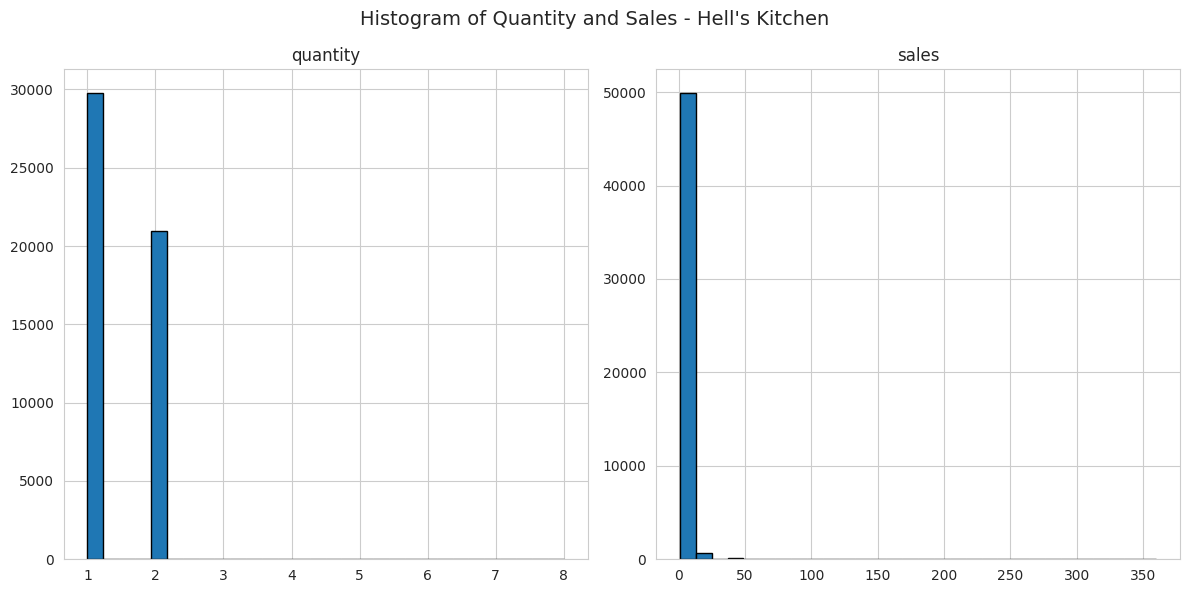

In [67]:
features = ['quantity', 'sales']

df[features].hist(
    figsize=(12,6),   # lebih lebar
    bins=30,          # lebih detail distribusi
    edgecolor='black' # biar tiap bar jelas
)

plt.suptitle("Histogram of Quantity and Sales - Hell's Kitchen", fontsize=14)
plt.tight_layout()
plt.show()


### Histogram Visualization

The histogram is displayed with 30 bins to provide a clearer view of the distribution.

The quantity variable shows that most transactions involve 1–2 items.

The sales distribution remains highly right-skewed, with most transactions below 10, while a small number of extreme values extend far to the right.

The zoomed visualization helps improve clarity without changing the underlying data interpretation.


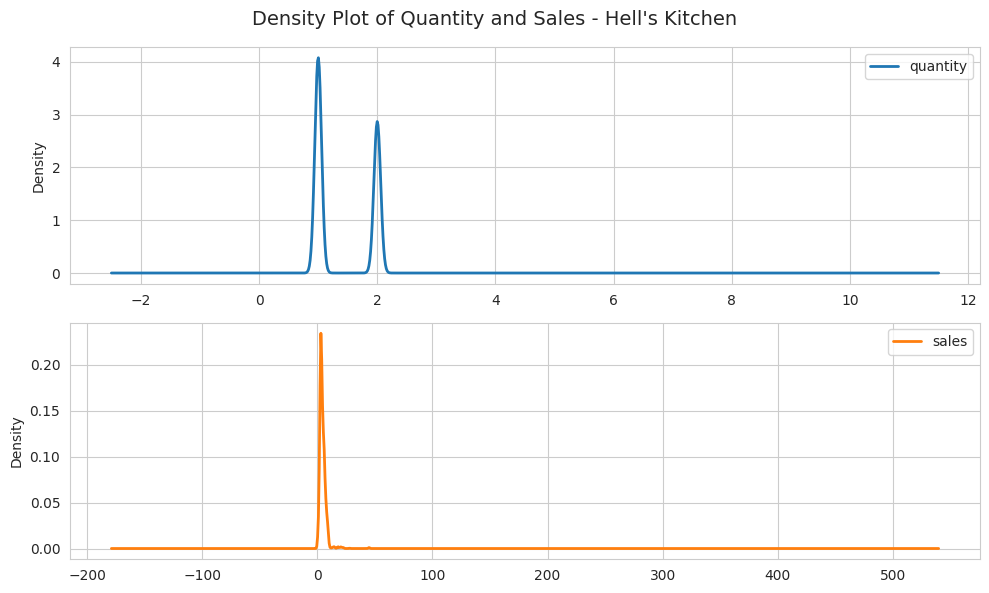

In [68]:
df[features].plot(
    kind='density',
    subplots=True,
    layout=(2,1),
    sharex=False,
    figsize=(10,6),
    linewidth=2
)

plt.suptitle("Density Plot of Quantity and Sales - Hell's Kitchen", fontsize=14)
plt.tight_layout()
plt.show()


### Density Plot Analysis

The density plot provides a smoothed view of the distribution.

#### Quantity
The quantity variable shows two clear peaks around 1 and 2 items.
This confirms that most customers purchase either one or two items per transaction.
The distribution is moderately positively skewed.

#### Sales
The sales variable shows a sharp concentration around lower values (approximately 3–5).
However, there is a very long right tail extending beyond 300.

This confirms the extremely high skewness (45.18) and very high kurtosis (2704),
indicating the presence of extreme outliers in the sales variable.

The majority of transactions are low-value purchases,
while a very small number of transactions are exceptionally large.


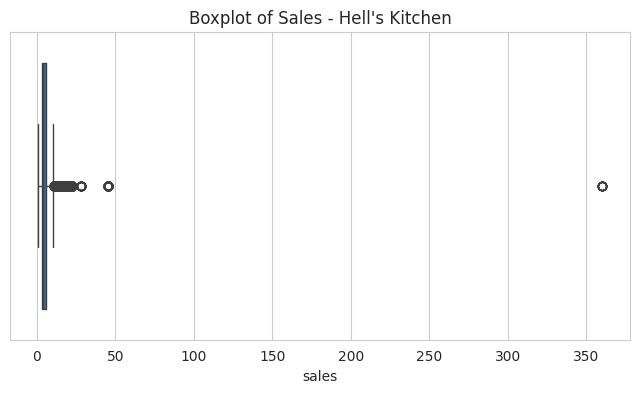

In [69]:
plt.figure(figsize=(8,4))
sns.boxplot(x='sales', data=df)
plt.title("Boxplot of Sales - Hell's Kitchen")
plt.show()

### Boxplot Analysis – Sales

The boxplot shows that the majority of sales values are concentrated in a very narrow range near the lower end.

The median appears around 3–4, confirming the descriptive statistics.

However, several outliers are visible on the right side of the distribution.

One extreme value around 360 is clearly separated from the rest of the data.

This confirms that the sales variable contains extreme high-value transactions that heavily skew the distribution.


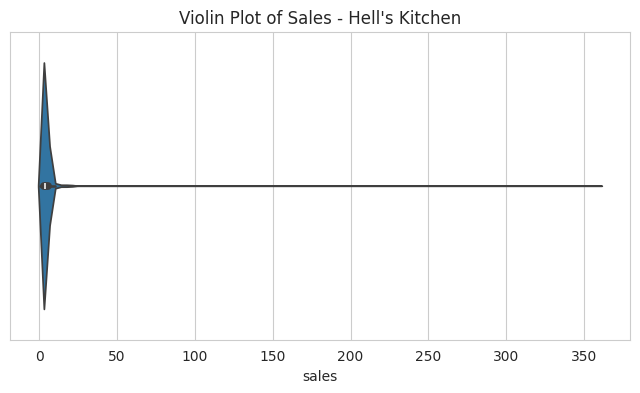

In [70]:
plt.figure(figsize=(8,4))
sns.violinplot(x='sales', data=df)
plt.title("Violin Plot of Sales - Hell's Kitchen")
plt.show()


### Violin Plot Analysis – Sales

The violin plot shows a highly concentrated distribution at lower sales values.

Most transactions occur between approximately 2 and 6.

The distribution extends with a very long thin tail toward higher values,
reaching up to 360.

This confirms extreme positive skewness in the sales variable.

The data is clearly not normally distributed,
and a small number of high-value transactions heavily influence the overall distribution.


For categorical variables, we use a bar plot.

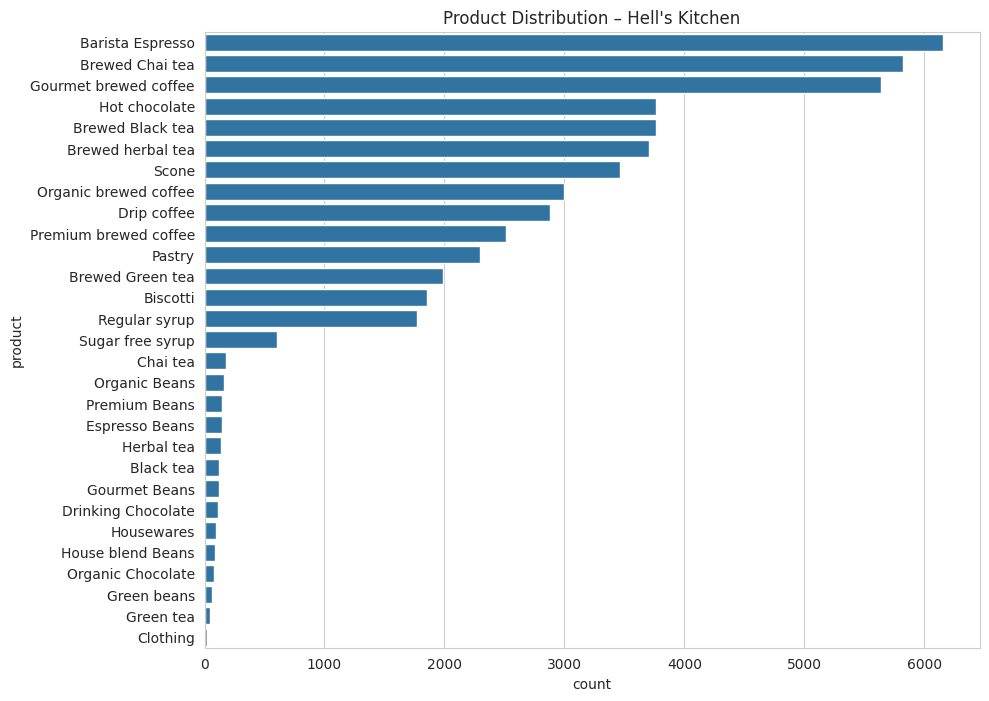

In [71]:
plt.figure(figsize=(10,8))
sns.countplot(y='product',
              data=df,
              order=df['product'].value_counts().index)
plt.title("Product Distribution – Hell's Kitchen")
plt.show()


## Product Distribution Analysis – Hell's Kitchen

The bar chart displays the frequency of products sold at the Hell's Kitchen store.

The most frequently purchased product is **Barista Espresso**, followed by **Brewed Chai Tea** and **Gourmet Brewed Coffee**.

This indicates a strong customer preference for coffee-based beverages.

Products such as clothing, housewares, and specialty beans appear at the bottom of the distribution, suggesting low customer demand for non-beverage items.

Overall, beverage products dominate sales volume at this store location.


# Multivariate Analysis: Non-Graphical

We calculate the Pearson correlation coefficient.


In [72]:
df.corr(numeric_only=True)

,order_id,quantity,sales
order_id,1.000000,-0.004032,0.005413
quantity,-0.004032,1.000000,0.334302
sales,0.005413,0.334302,1.000000


# Multivariate Analysis: Graphical

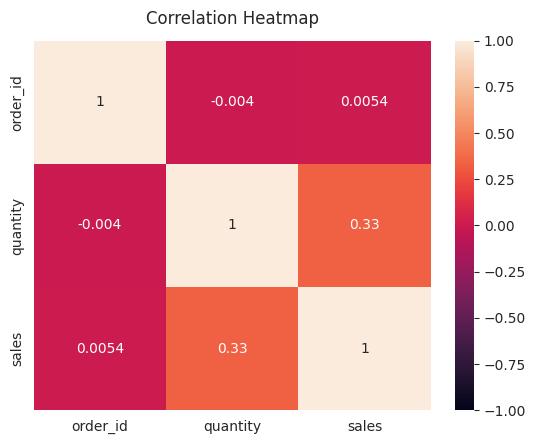

In [73]:
heatmap = sns.heatmap(df.corr(numeric_only=True),
                      vmin=-1,
                      vmax=1,
                      annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Correlation Analysis

The correlation heatmap shows the linear relationship between numerical variables.

- order_id has near-zero correlation with both quantity and sales, which is expected since it is only an identifier.
- The correlation between quantity and sales is 0.33.

A correlation value of 0.33 indicates a weak to moderate positive relationship.

This means that as quantity increases, sales tend to increase as well,
but the relationship is not very strong.

The moderate strength may be explained by variations in product prices.


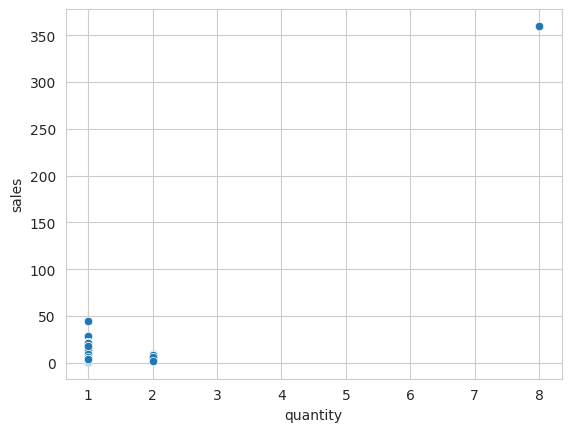

In [74]:
sns.scatterplot(x='quantity', y='sales', data=df);

## Scatter Plot Analysis – Quantity vs Sales

The scatter plot shows a general upward trend between quantity and sales.

Most transactions occur at quantity values of 1 and 2,
with sales typically below 10.

A significant outlier appears at quantity 8 with sales around 360,
which strongly influences the scale of the visualization.

Although there is a positive relationship,
the data points are widely scattered,
confirming that the correlation (0.33) is weak to moderate.


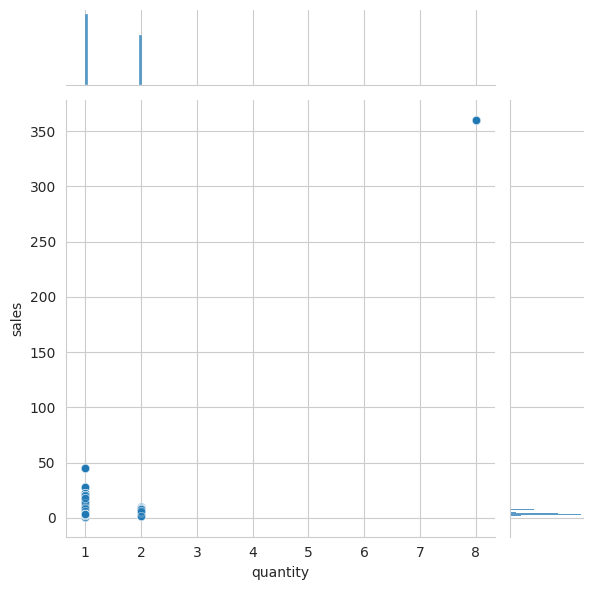

In [75]:
sns.jointplot(x='quantity',
              y='sales',
              data=df,
              height=6,
              alpha=0.6)

## Joint Plot Analysis – Quantity vs Sales

The joint plot combines both distribution and relationship analysis.

The central scatter plot shows a weak upward trend,
indicating a positive relationship between quantity and sales.

Most transactions occur at quantity values of 1 and 2,
with sales concentrated below 10.

The marginal distributions confirm that:
- Quantity is heavily concentrated at low values.
- Sales is extremely right-skewed.

A clear outlier appears at a very high sales value (around 360),
which significantly affects the scale of the visualization.

Overall, the joint plot supports previous findings from the correlation and scatter plot analysis.


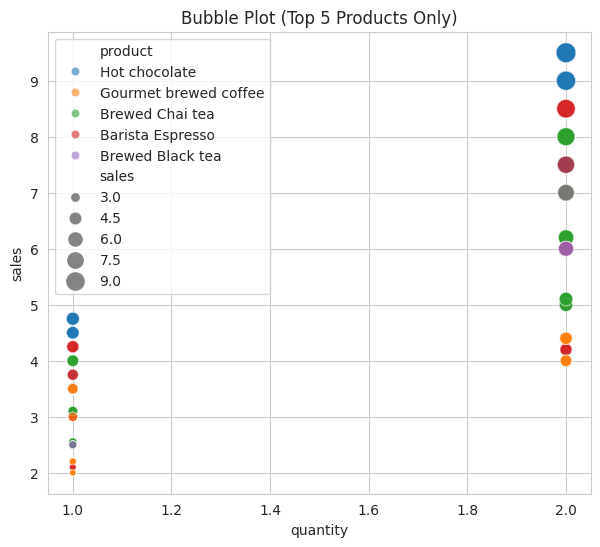

In [76]:
top5 = df['product'].value_counts().head(5).index

plt.figure(figsize=(7,6))
sns.scatterplot(
    x='quantity',
    y='sales',
    hue='product',
    size='sales',
    sizes=(20,200),
    alpha=0.6,
    data=df[df['product'].isin(top5)]
)

plt.title("Bubble Plot (Top 5 Products Only)")
plt.show()


### Key Multivariate Insight

The bubble plot highlights that extreme sales values are rare events.

Most transactions are small in both quantity and value,
and product category does not drastically change the overall relationship between quantity and sales.

Outliers significantly impact visualization scale and may influence predictive modeling.


# Final Conclusion

This exploratory data analysis examined transaction data from the Hell's Kitchen store location.

From the basic analysis, the dataset contains 50,735 transactions with no missing values, indicating a clean and reliable dataset for analysis.

Univariate analysis revealed that:

- Most customers purchase only 1–2 items per transaction.
- Sales values are heavily concentrated at lower amounts.
- The sales variable exhibits extreme positive skewness and very high kurtosis.
- A small number of high-value transactions (e.g., sales around 360) significantly distort the distribution.

Graphical analysis (histogram, density plot, boxplot, and violin plot) consistently confirmed the presence of strong right-skewness and extreme outliers in the sales variable.

Categorical analysis showed that beverage products, particularly espresso and brewed beverages, dominate transaction frequency. Non-beverage retail items contribute minimally to total transactions.

Multivariate analysis revealed:

- A weak to moderate positive correlation (0.33) between quantity and sales.
- Higher quantities generally lead to higher sales.
- However, price variation across products reduces the strength of the linear relationship.
- Extreme outliers influence the scale of visualizations and overall distribution patterns.

Overall, the Hell's Kitchen store operates primarily as a beverage-focused outlet, characterized by high transaction frequency of low-value purchases and occasional high-value transactions.

These findings provide a strong foundation for future predictive modeling, though treatment of outliers and potential transformation of the sales variable may be necessary before building regression models.
